In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [71]:
train_df = pd.read_csv("files/CarPrice_Assignment (1).csv")

In [72]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [73]:
train_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [74]:
train_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [75]:
train_df["CarName"].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [76]:
single_word_cars = train_df["CarName"][train_df["CarName"].str.split().apply(len) == 1]

train_df[["make", "model"]] = train_df["CarName"].str.extract(r'^([\w-]+)\s+(.*)$')

train_df.loc[train_df["CarName"].str.split().apply(len) == 1, "make"] = train_df["CarName"]
train_df.loc[train_df["CarName"].str.split().apply(len) == 1, "model"] = np.nan

In [77]:
train_df["make"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [78]:
corrections = {
    'maxda': 'mazda',
    'Nissan': 'nissan',
    'porcshce': 'porsche',
    'toyouta': 'toyota',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen'
}

train_df['make'] = train_df['make'].replace(corrections)

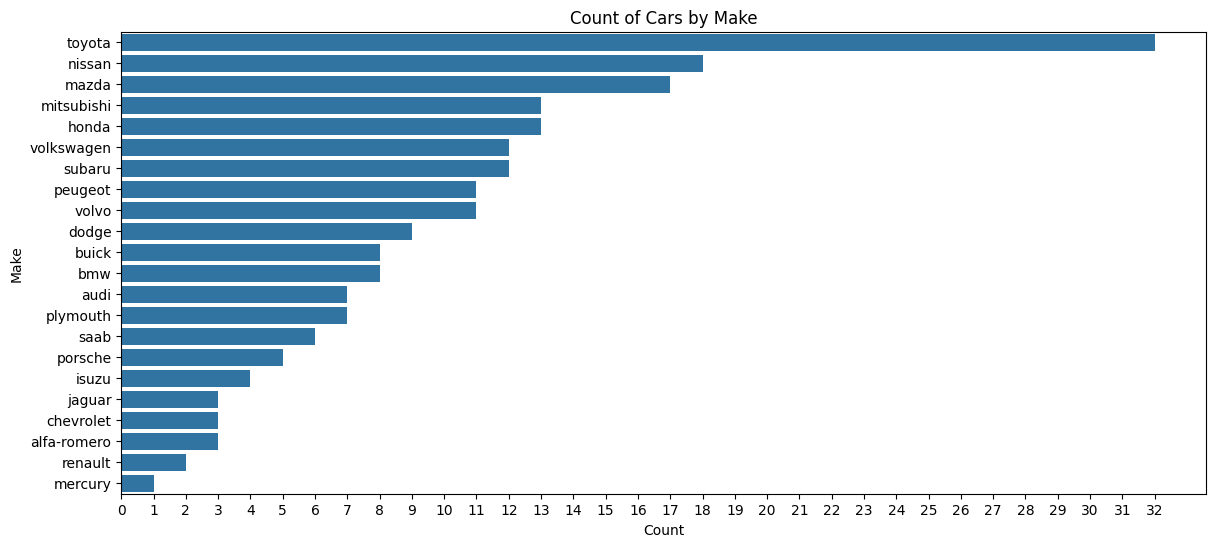

In [79]:
make_counts = train_df["make"].value_counts().reset_index()
make_counts.columns = ["make", "count"]


plt.figure(figsize=(14, 6))
sns.barplot(data=make_counts, x="count", y="make")
plt.title("Count of Cars by Make")
plt.xlabel("Count")
plt.ylabel("Make")

current_axis = plt.gca()
current_axis.set_xticks(range(0, make_counts['count'].max() + 1))

plt.show()

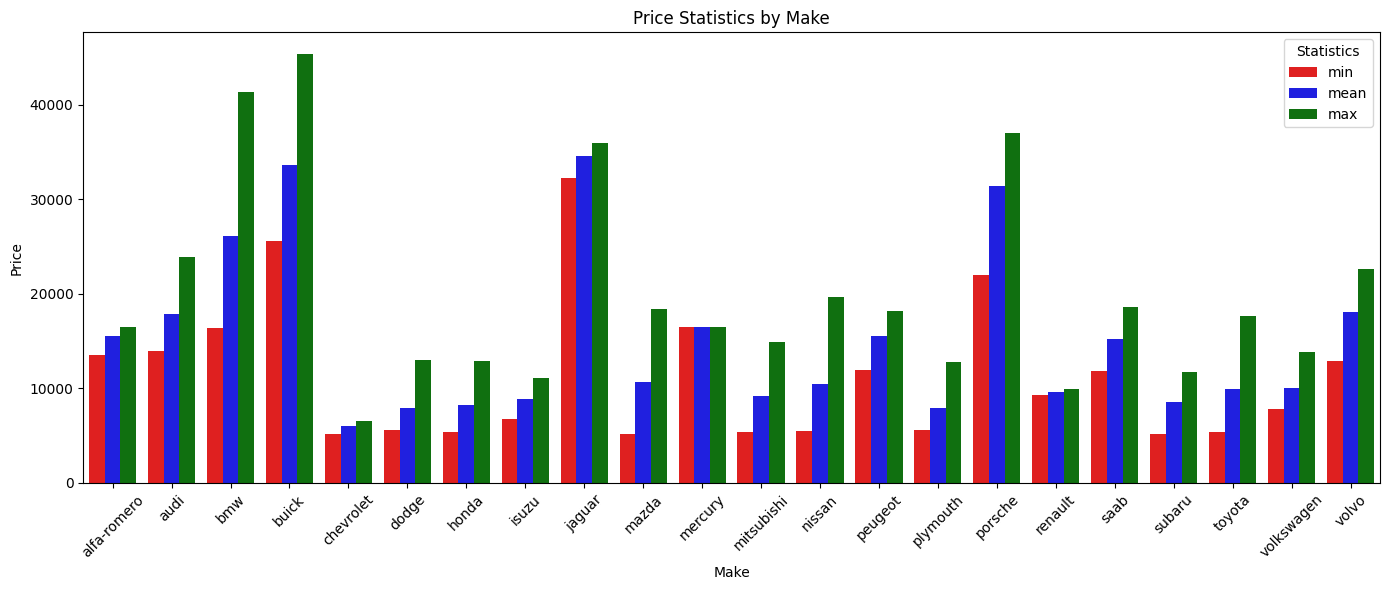

In [80]:
make_price_stats = train_df.groupby("make")["price"].agg(["min", "mean", "max"]).reset_index()

plt.figure(figsize=(14, 6))

sns.barplot(data=make_price_stats.melt(id_vars="make", value_vars=["min", "mean", "max"]),
            x="make", y="value", hue="variable", palette={"min": "red", "mean": "blue", "max": "green"})

plt.title("Price Statistics by Make")
plt.xlabel("Make")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.legend(title="Statistics")

plt.tight_layout()
plt.show()

In [81]:
object_columns = [col for col in train_df.columns if train_df[col].dtype == "object"]
not_object_columns = [col for col in train_df.columns if train_df[col].dtype != "object"]
object_columns

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'make',
 'model']

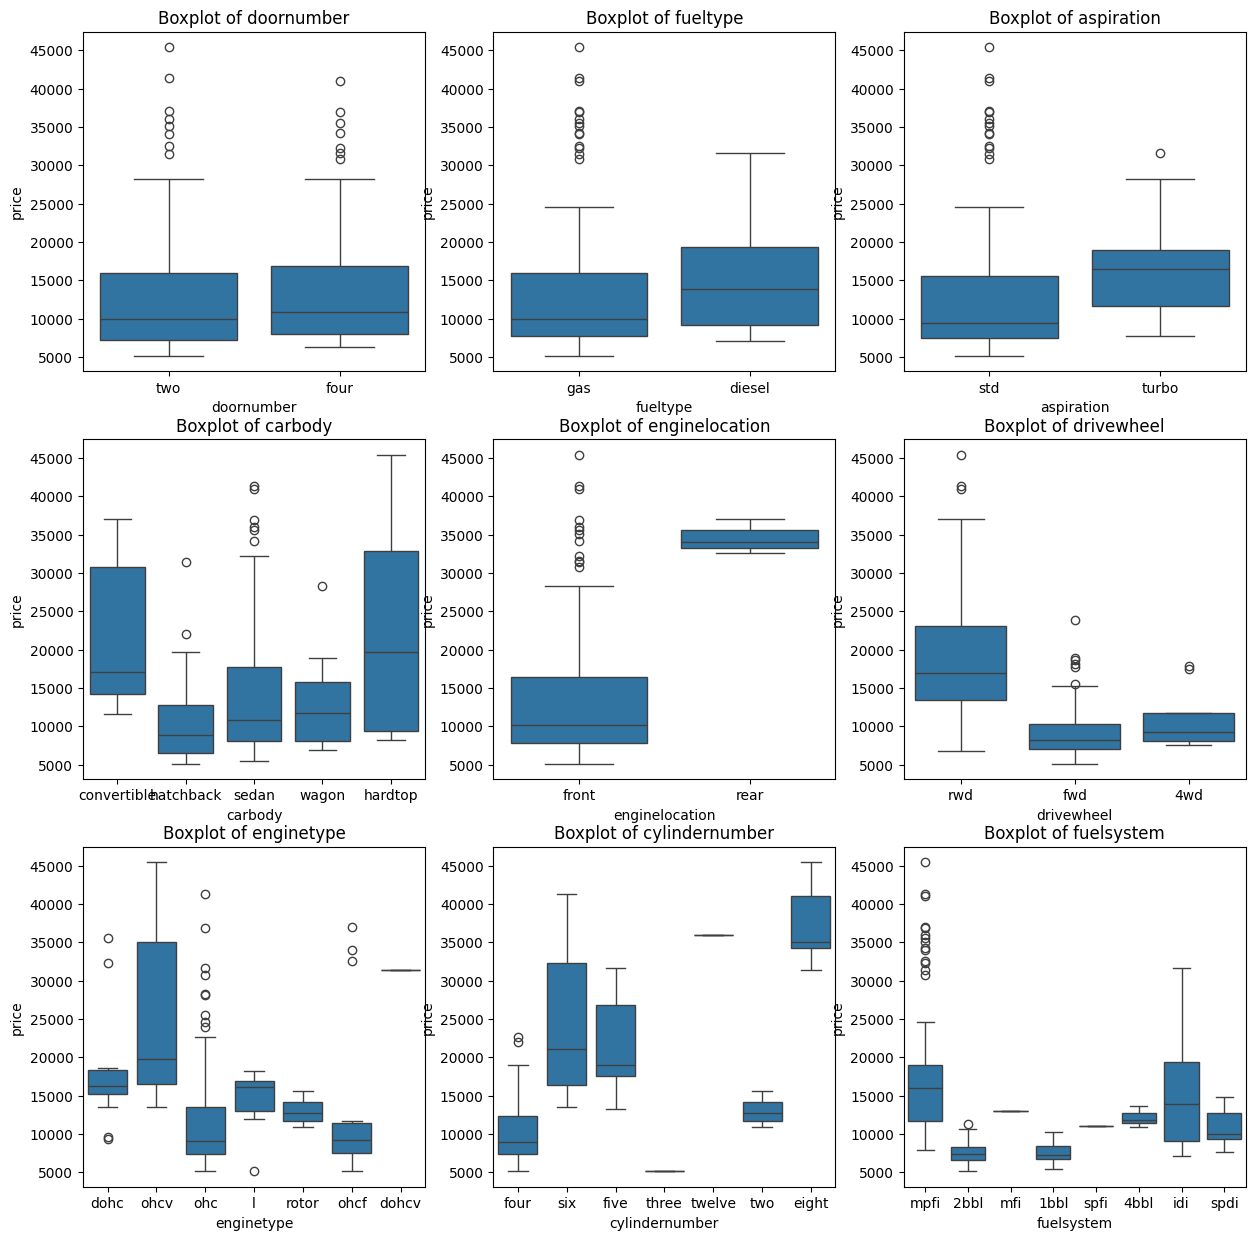

In [82]:
features=['doornumber','fueltype','aspiration','carbody','enginelocation','drivewheel','enginetype','cylindernumber','fuelsystem']

plt.figure(figsize=(15, 15))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x = feature, y = "price", data = train_df)
    plt.title(f"Boxplot of {feature}")

plt.show()

In [83]:
train_df = pd.get_dummies(train_df, columns=['fueltype'], prefix='is_fueltype', prefix_sep='_', dtype=int)
train_df = pd.get_dummies(train_df, columns=['aspiration'], prefix='is_aspiration', prefix_sep='_', dtype=int)
train_df = pd.get_dummies(train_df, columns=['doornumber'], prefix='is_doornumber', prefix_sep='_', dtype=int)
train_df = pd.get_dummies(train_df, columns=['drivewheel'], prefix='is_drivewheel', prefix_sep='_', dtype=int)
train_df = pd.get_dummies(train_df, columns=['enginelocation'], prefix='is_enginelocation', prefix_sep='_', dtype=int)
train_df = pd.get_dummies(train_df, columns=['enginetype'], prefix='is_enginetype', prefix_sep='_', dtype=int)
train_df = pd.get_dummies(train_df, columns=['cylindernumber'], prefix='is_cylindernumber', prefix_sep='_', dtype=int)
train_df = pd.get_dummies(train_df, columns=['fuelsystem'], prefix='is_fuelsystem', prefix_sep='_', dtype=int)

In [84]:
train_df

,car_ID,symboling,CarName,carbody,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,is_cylindernumber_twelve,is_cylindernumber_two,is_fuelsystem_1bbl,is_fuelsystem_2bbl,is_fuelsystem_4bbl,is_fuelsystem_idi,is_fuelsystem_mfi,is_fuelsystem_mpfi,is_fuelsystem_spdi,is_fuelsystem_spfi
0,1,3,alfa-romero giulia,convertible,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,0,0,0,0,1,0,0
1,2,3,alfa-romero stelvio,convertible,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,0,0,0,0,1,0,0
2,3,1,alfa-romero Quadrifoglio,hatchback,94.5,171.2,65.5,52.4,2823,152,...,0,0,0,0,0,0,0,1,0,0
3,4,2,audi 100 ls,sedan,99.8,176.6,66.2,54.3,2337,109,...,0,0,0,0,0,0,0,1,0,0
4,5,2,audi 100ls,sedan,99.4,176.6,66.4,54.3,2824,136,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),sedan,109.1,188.8,68.9,55.5,2952,141,...,0,0,0,0,0,0,0,1,0,0
201,202,-1,volvo 144ea,sedan,109.1,188.8,68.8,55.5,3049,141,...,0,0,0,0,0,0,0,1,0,0
202,203,-1,volvo 244dl,sedan,109.1,188.8,68.9,55.5,3012,173,...,0,0,0,0,0,0,0,1,0,0
203,204,-1,volvo 246,sedan,109.1,188.8,68.9,55.5,3217,145,...,0,0,0,0,0,1,0,0,0,0


In [85]:
target_mean = round(train_df["price"].mean(), 2)
target_median = train_df["price"].median()
# target_mode = train_df['price'].mode()[0]

In [86]:
target_bins = train_df["price"] // 100 * 100

# 0 - 100 --> 0
# 101 - 200 --> 1
# 2001 - 300 --> 2
#...

target_adjust_mode = target_bins.mode()[0]
target_adjust_mode

8900.0

In [87]:
target_bins.unique()

array([13400., 16500., 13900., 17400., 15200., 17700., 18900., 23800.,
       17800., 16400., 16900., 20900., 21100., 24500., 30700., 41300.,
       36800.,  5100.,  6200.,  6500.,  5500.,  6300.,  7900.,  6600.,
        7600.,  8500.,  8900., 12900.,  6400.,  6800.,  5300.,  7100.,
        7200.,  7800.,  9000.,  8800., 10200., 10300.,  6700., 11000.,
       32200., 35500., 36000.,  6000.,  7300., 10900., 11800., 13600.,
       15600.,  8400., 10500., 10700., 11200., 18200., 18300., 25500.,
       28200., 28100., 31600., 34100., 35000., 40900., 45400.,  6100.,
        9900., 12600., 14800., 14400.,  6900.,  8100.,  9200.,  5400.,
        7000.,  7700.,  7400.,  8200.,  9500., 14300., 17100., 19600.,
       11900., 13200., 12400., 13800., 15500., 16600., 17000., 17900.,
       18100., 12700., 22000., 32500., 34000., 37000., 31400.,  9800.,
       12100., 15000., 18600., 10100.,  8000., 11600.,  8700.,  8300.,
        9600., 11100., 11500., 17600., 10600., 10800., 15900., 15700.,
      

In [88]:
target_bins.value_counts().iloc[:10]

price
8900.0     6
9200.0     6
9900.0     6
16500.0    5
7700.0     5
6600.0     5
7900.0     5
8400.0     4
7600.0     4
13400.0    4
Name: count, dtype: int64

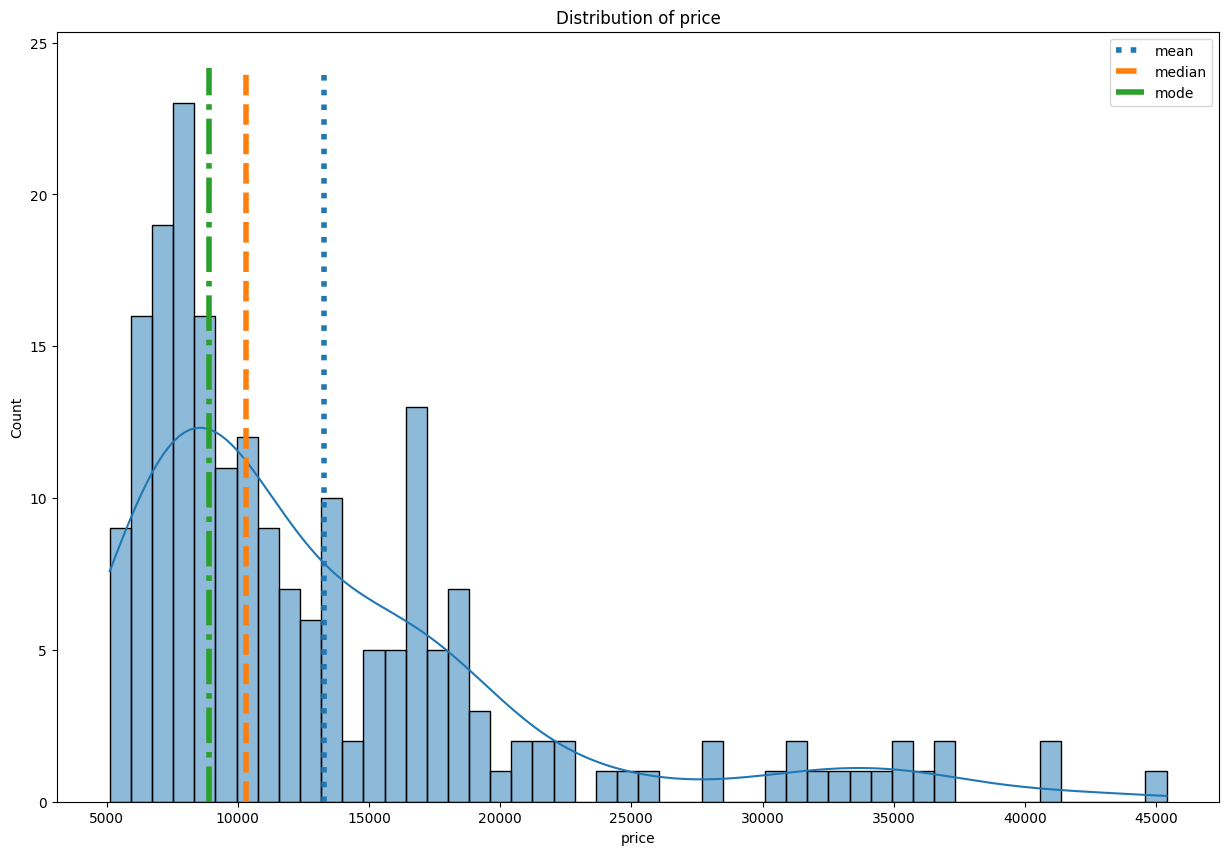

In [89]:
plt.figure(figsize=(15, 10))

sns.histplot(train_df["price"], bins=50, kde=True)

y = np.linspace(0, plt.gca().get_ylim()[1], 10)

plt.plot([target_mean] * 10, y, label='mean', linestyle=':', linewidth=4)
plt.plot([target_median] * 10, y, label="median", linestyle='--', linewidth=4)
# plt.plot([target_mode] * 10, y, label="mode", linestyle='-.', linewidth=4)
plt.plot([target_adjust_mode] * 10, y, label="mode", linestyle='-.', linewidth=4)

plt.title("Distribution of price")
plt.legend()
plt.show()

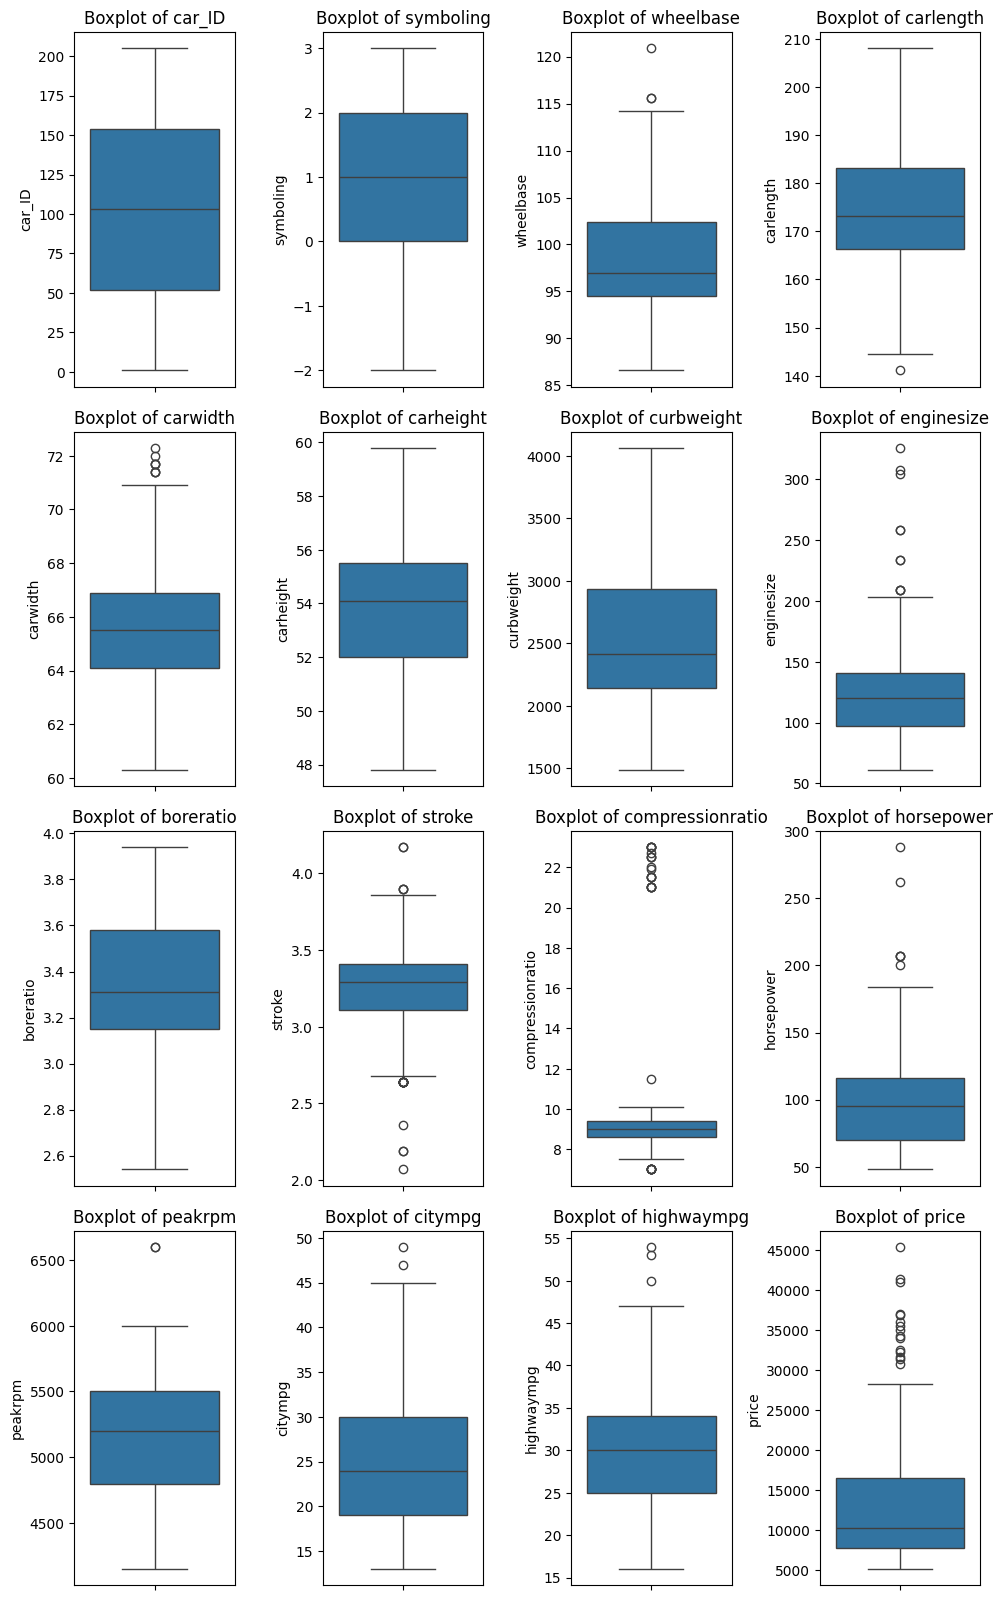

In [90]:
plt.figure(figsize=(10,len(not_object_columns) * 4))

for i, feature in enumerate(not_object_columns, 1):
    plt.subplot(len(not_object_columns), 4, i)
    sns.boxplot(train_df[feature])
    plt.title(f"Boxplot of {feature}")

plt.tight_layout()
plt.show()

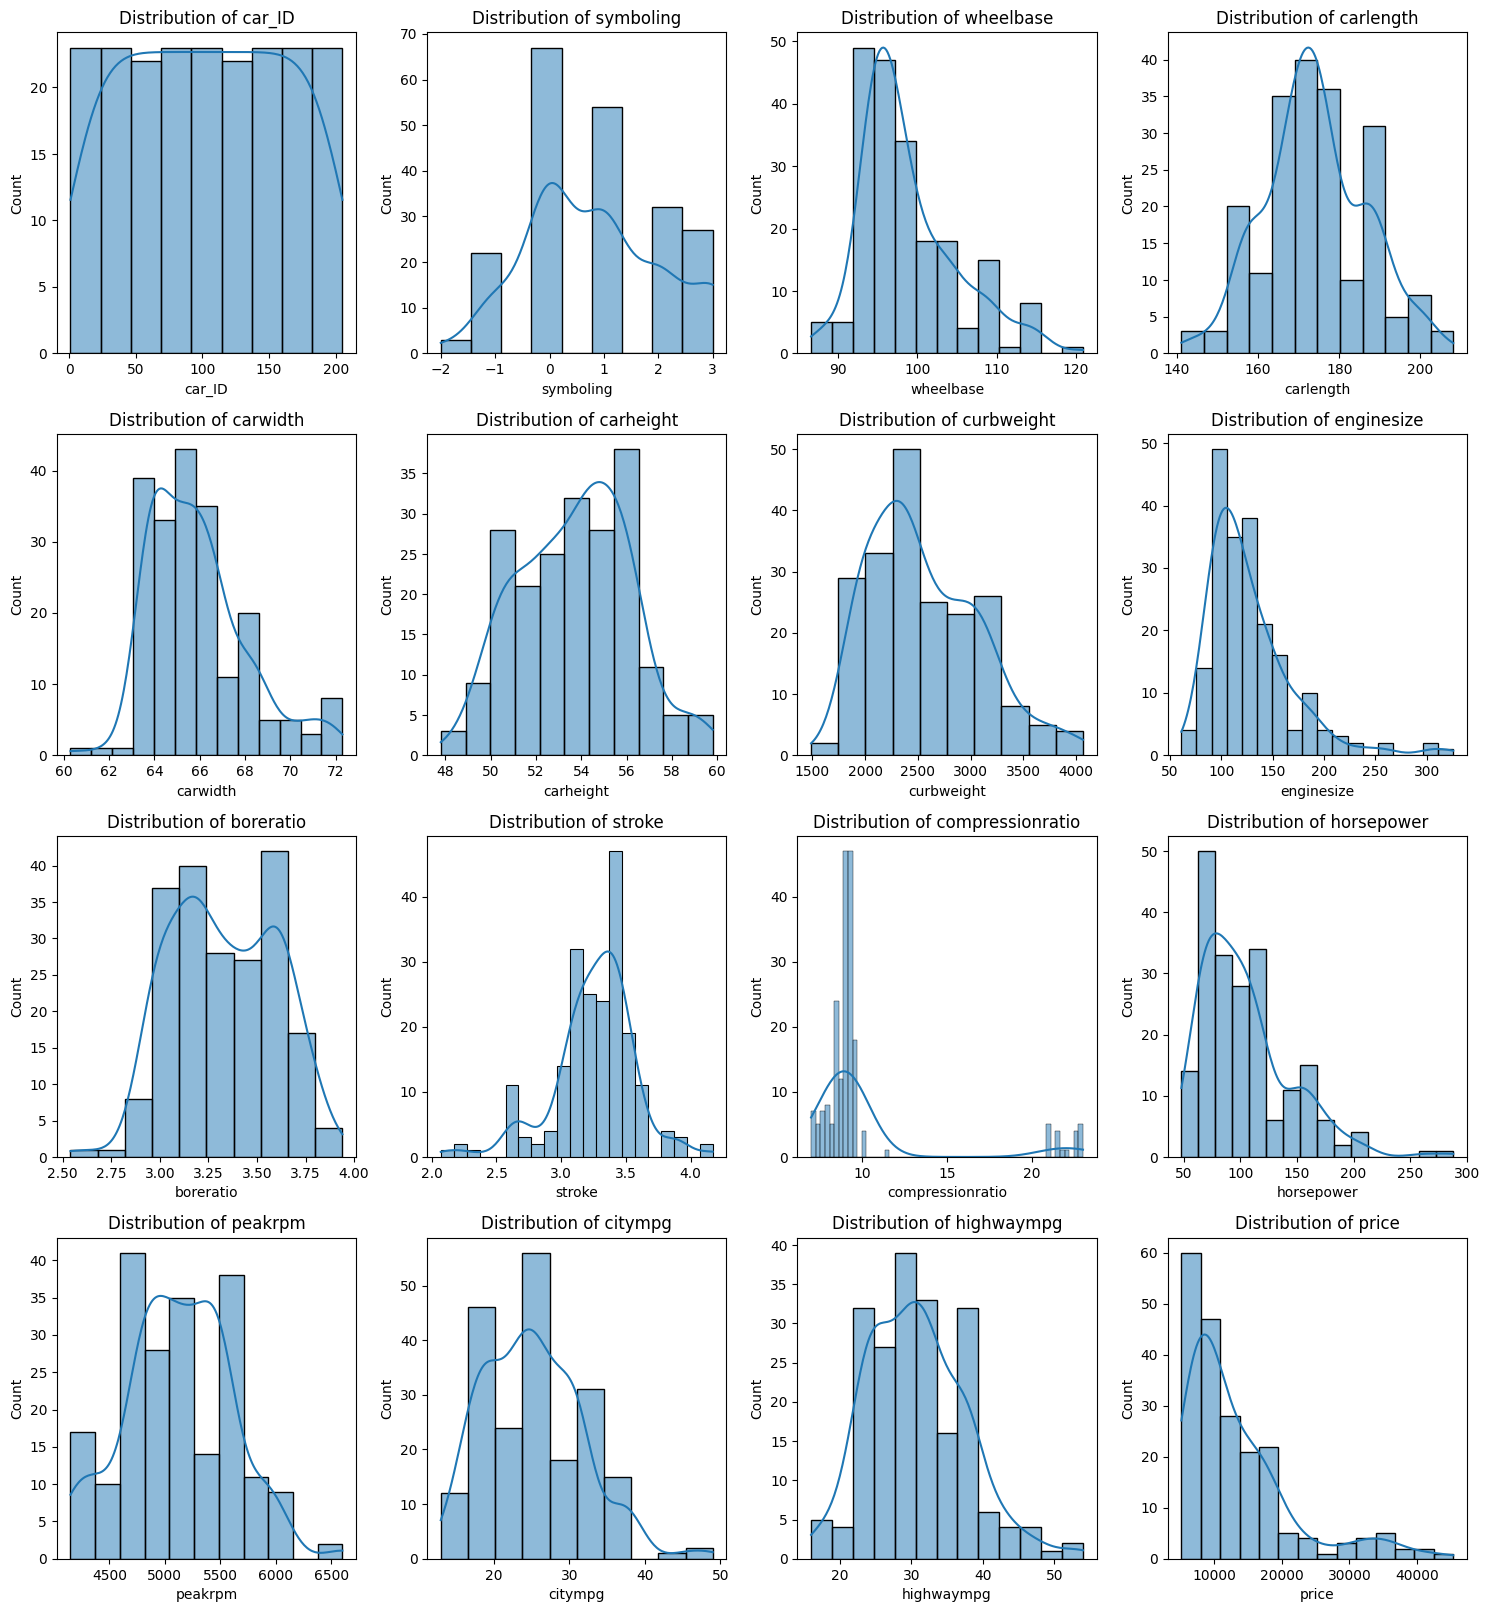

In [91]:
plt.figure(figsize=(15,len(not_object_columns) * 4))

for i, feature in enumerate(not_object_columns, 1):
    plt.subplot(len(not_object_columns), 4, i)
    sns.histplot(train_df[feature], kde=True)
    plt.title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()

<Axes: >

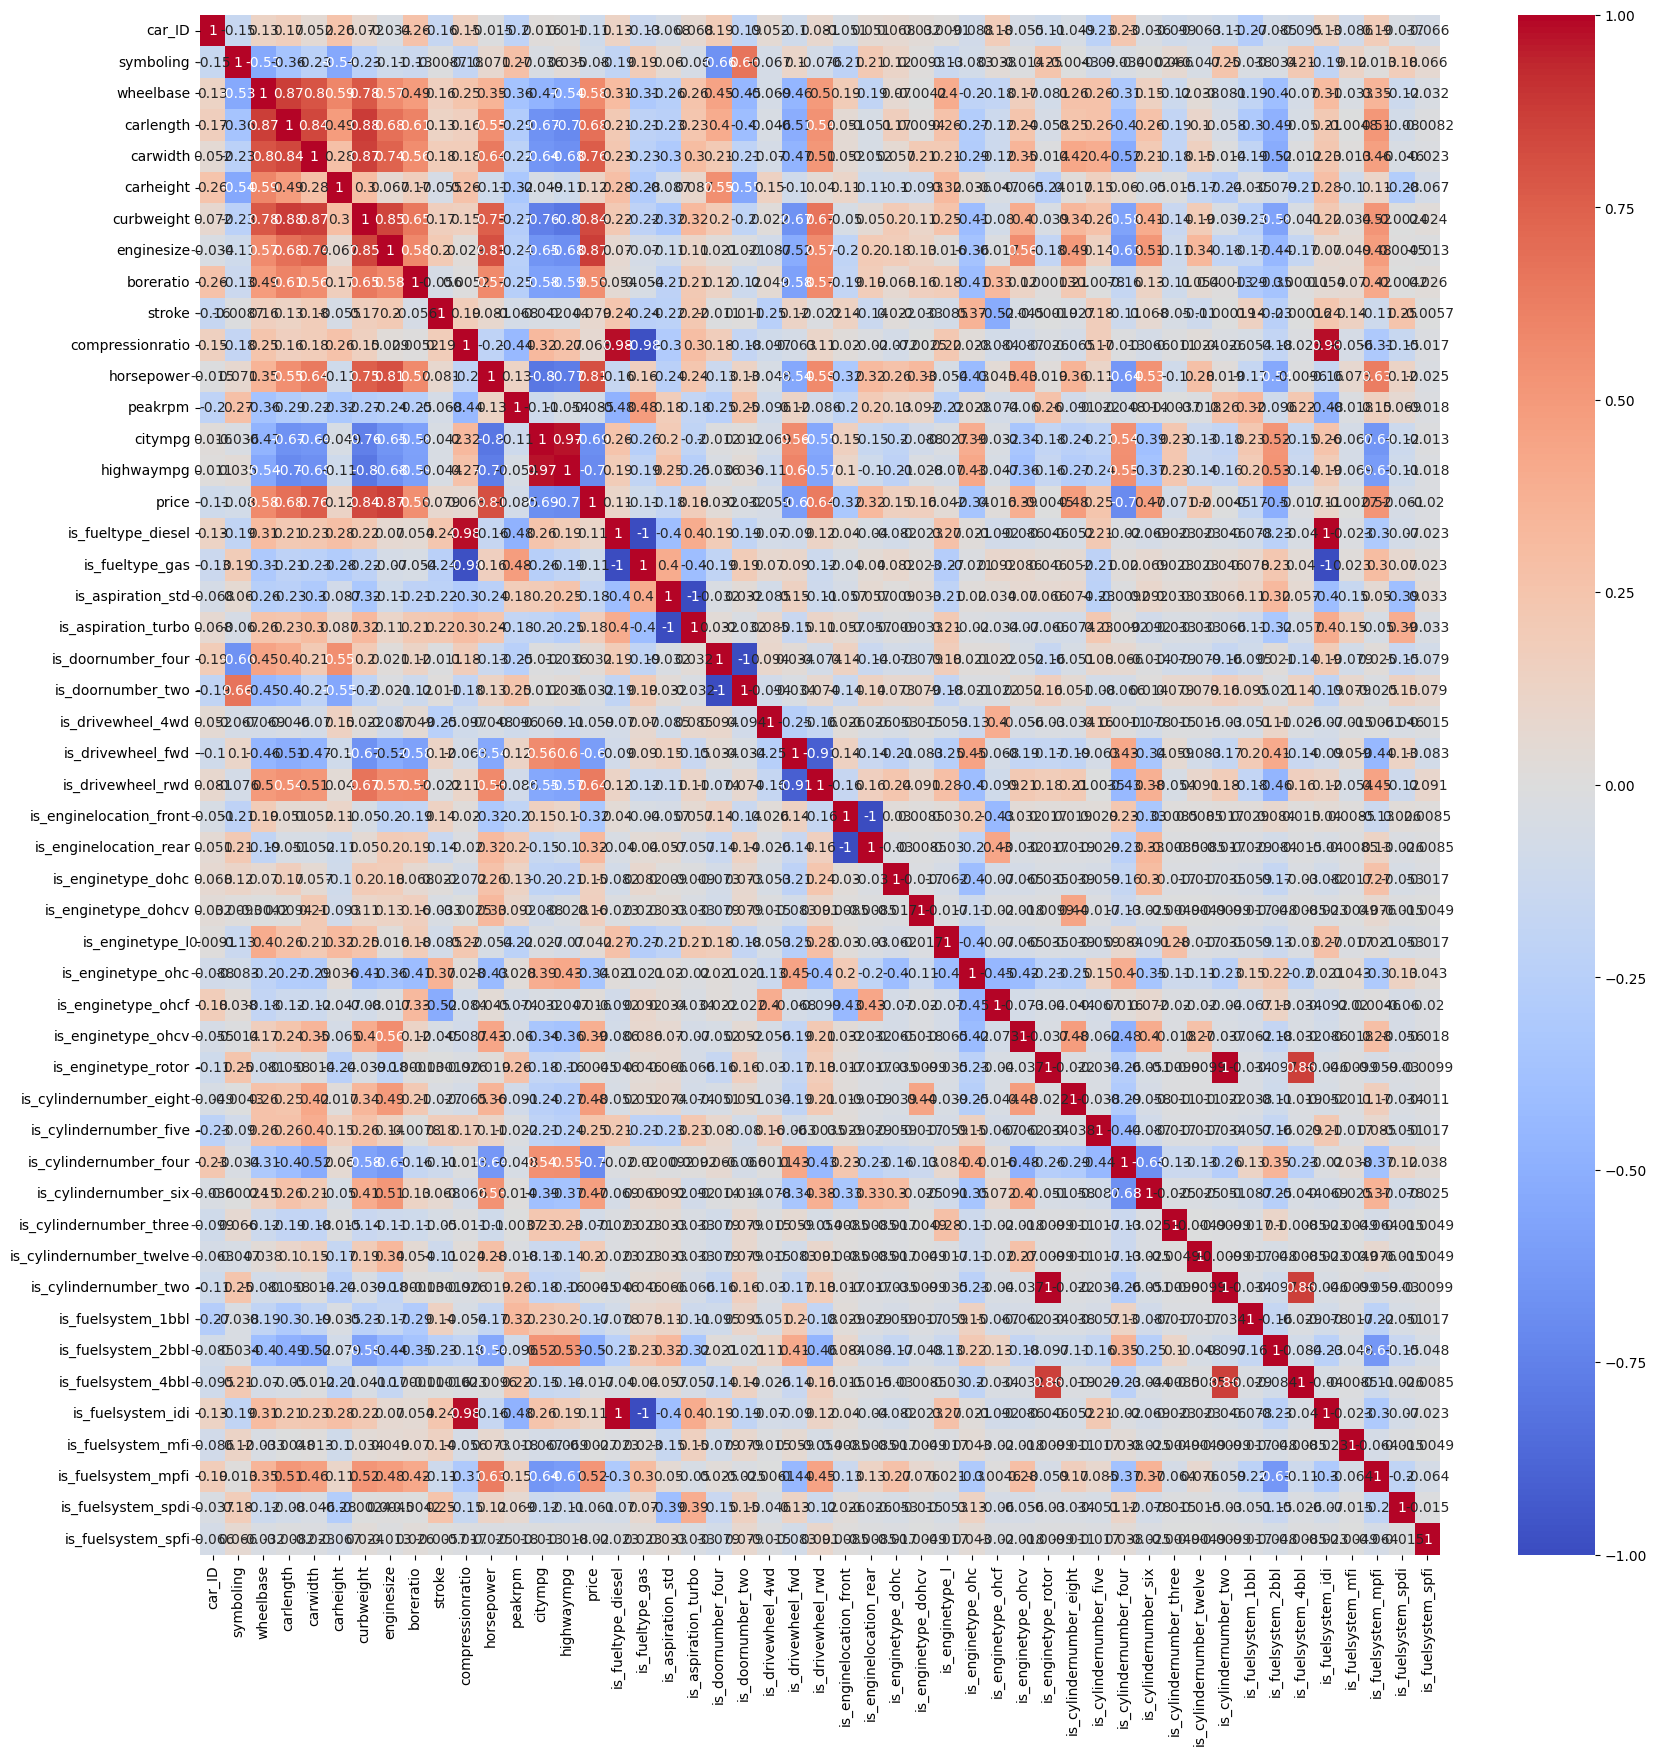

In [92]:
corr_matrix = train_df.corr(numeric_only=True)
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [98]:
abs_corr_price = corr_matrix["price"].abs()
top_20_corr = abs_corr_price.sort_values(ascending=False).head(20)
column_names = top_20_corr.index
top_20_corr

price                      1.000000
enginesize                 0.874145
curbweight                 0.835305
horsepower                 0.808139
carwidth                   0.759325
is_cylindernumber_four     0.697762
highwaympg                 0.697599
citympg                    0.685751
carlength                  0.682920
is_drivewheel_rwd          0.638957
is_drivewheel_fwd          0.601950
wheelbase                  0.577816
boreratio                  0.553173
is_fuelsystem_mpfi         0.517075
is_fuelsystem_2bbl         0.501374
is_cylindernumber_eight    0.478614
is_cylindernumber_six      0.474978
is_enginetype_ohcv         0.385991
is_enginetype_ohc          0.344270
is_enginelocation_front    0.324973
Name: price, dtype: float64

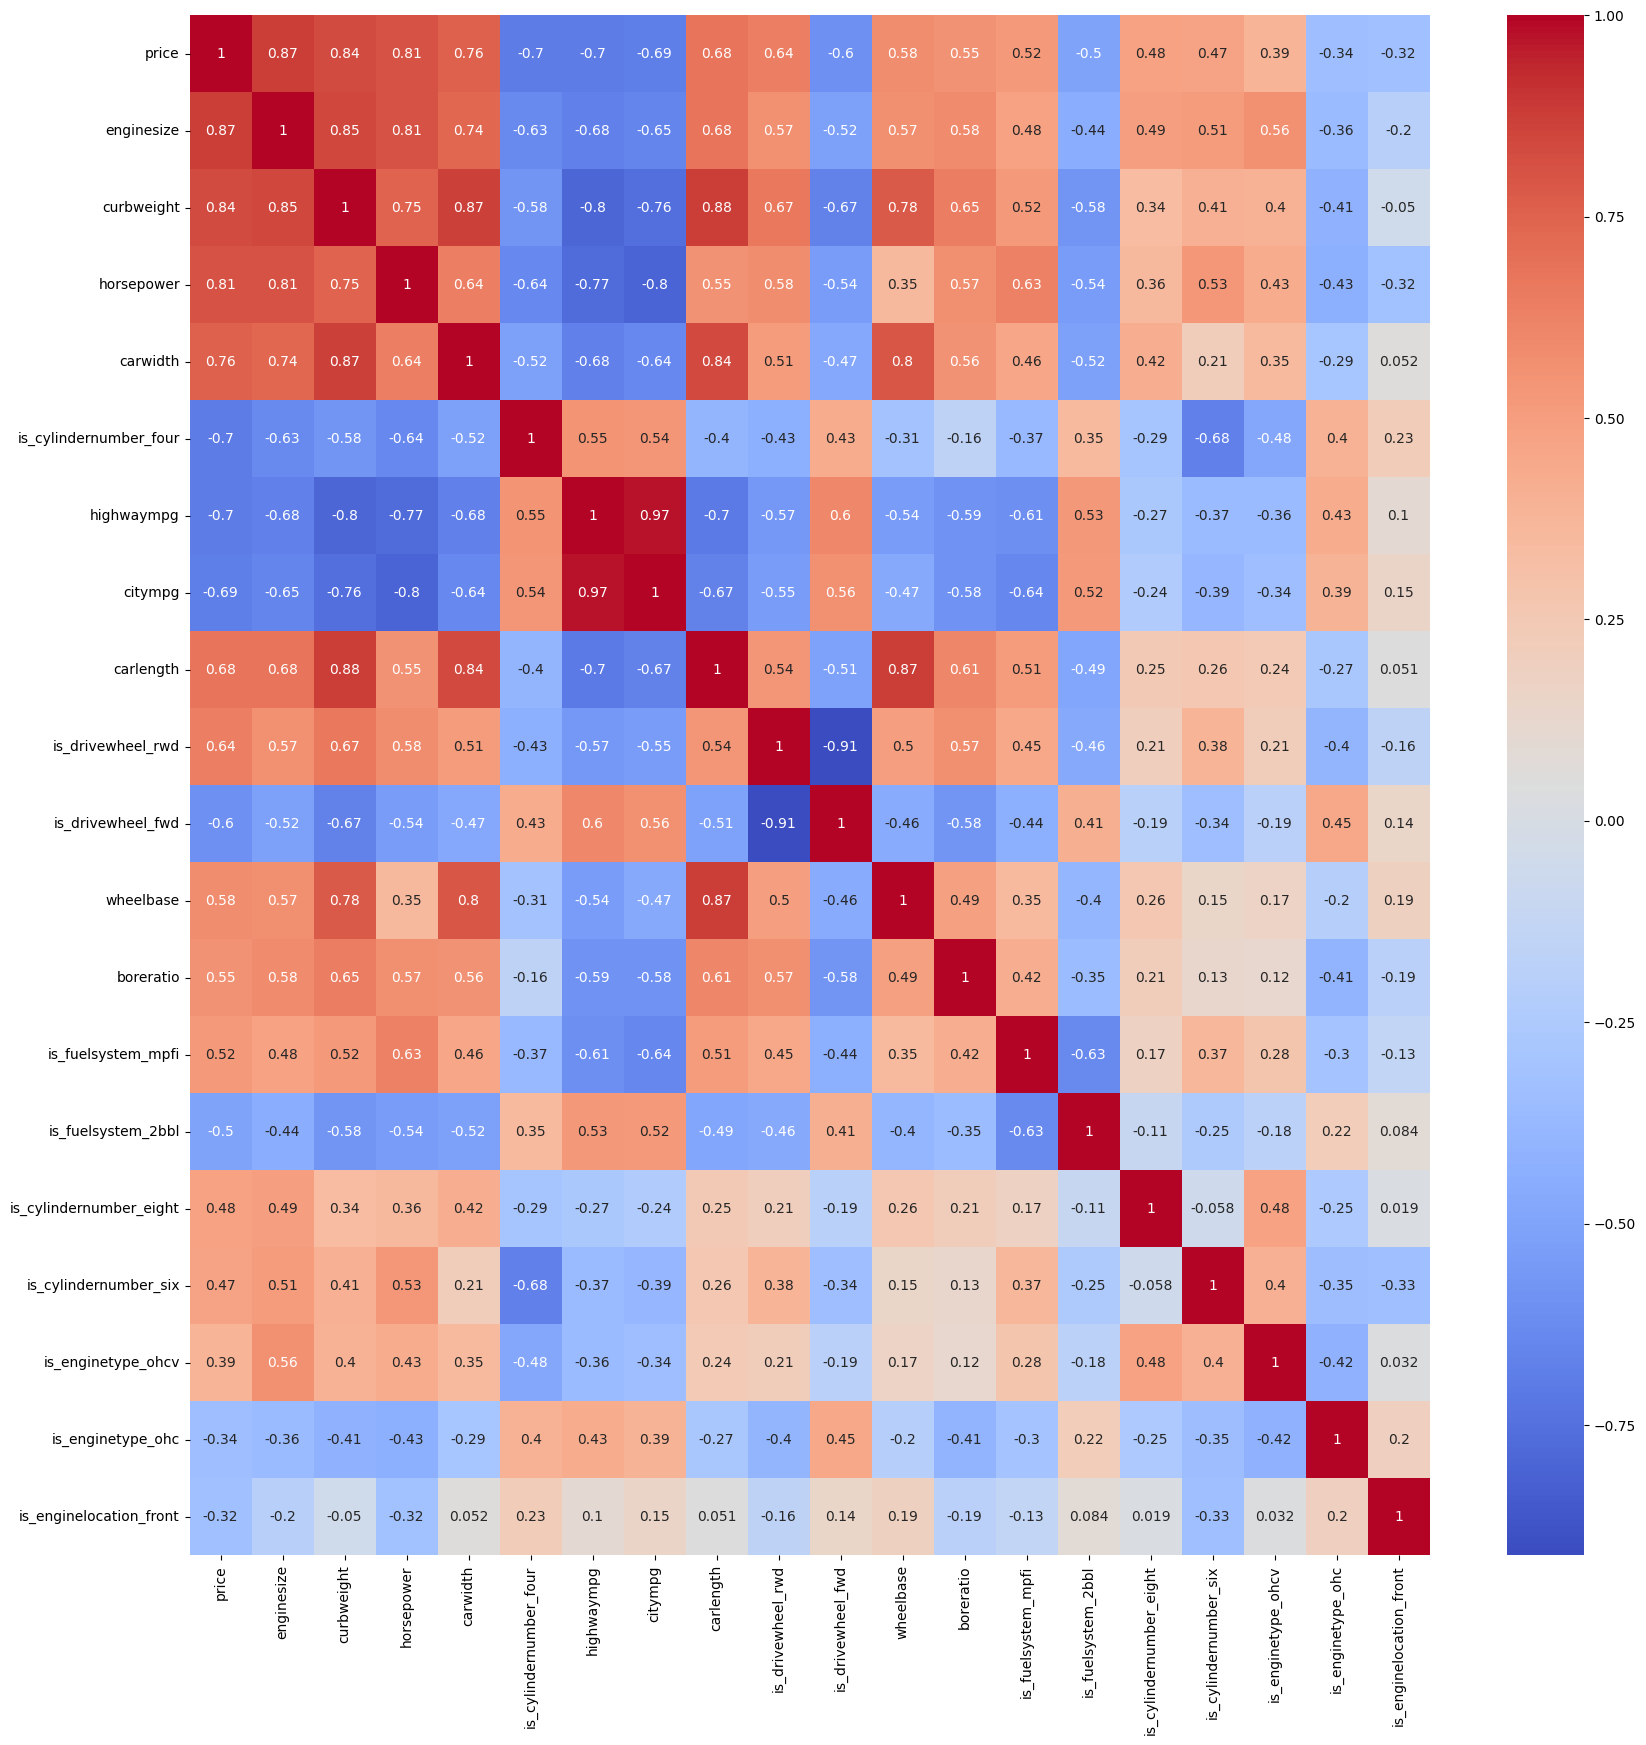

In [66]:
filtered_df = train_df[column_names]

corr_matrix = filtered_df.corr(numeric_only=True)
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

highwaympg, carwidth, is_cylindernumber_four, wheelbase, boreratio

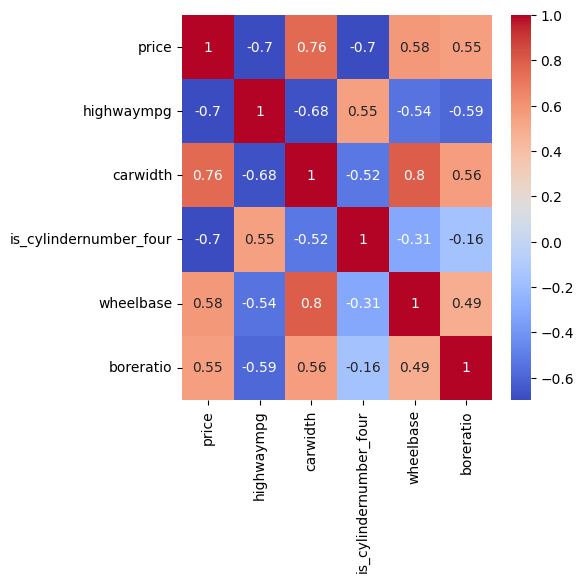

<Figure size 640x480 with 0 Axes>

In [68]:
filtered_df = train_df[["price", "highwaympg", "carwidth", "is_cylindernumber_four", "wheelbase", "boreratio"]]

corr_matrix = filtered_df.corr(numeric_only=True)
plt.figure(figsize=(5, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()
plt.savefig('corr.png', dpi=300)